In [185]:
import numpy as np
import matplotlib.pyplot as plt
from Project1 import double_pendulum

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) 

### Poincaré section to visualize the dynamics of the pendulum

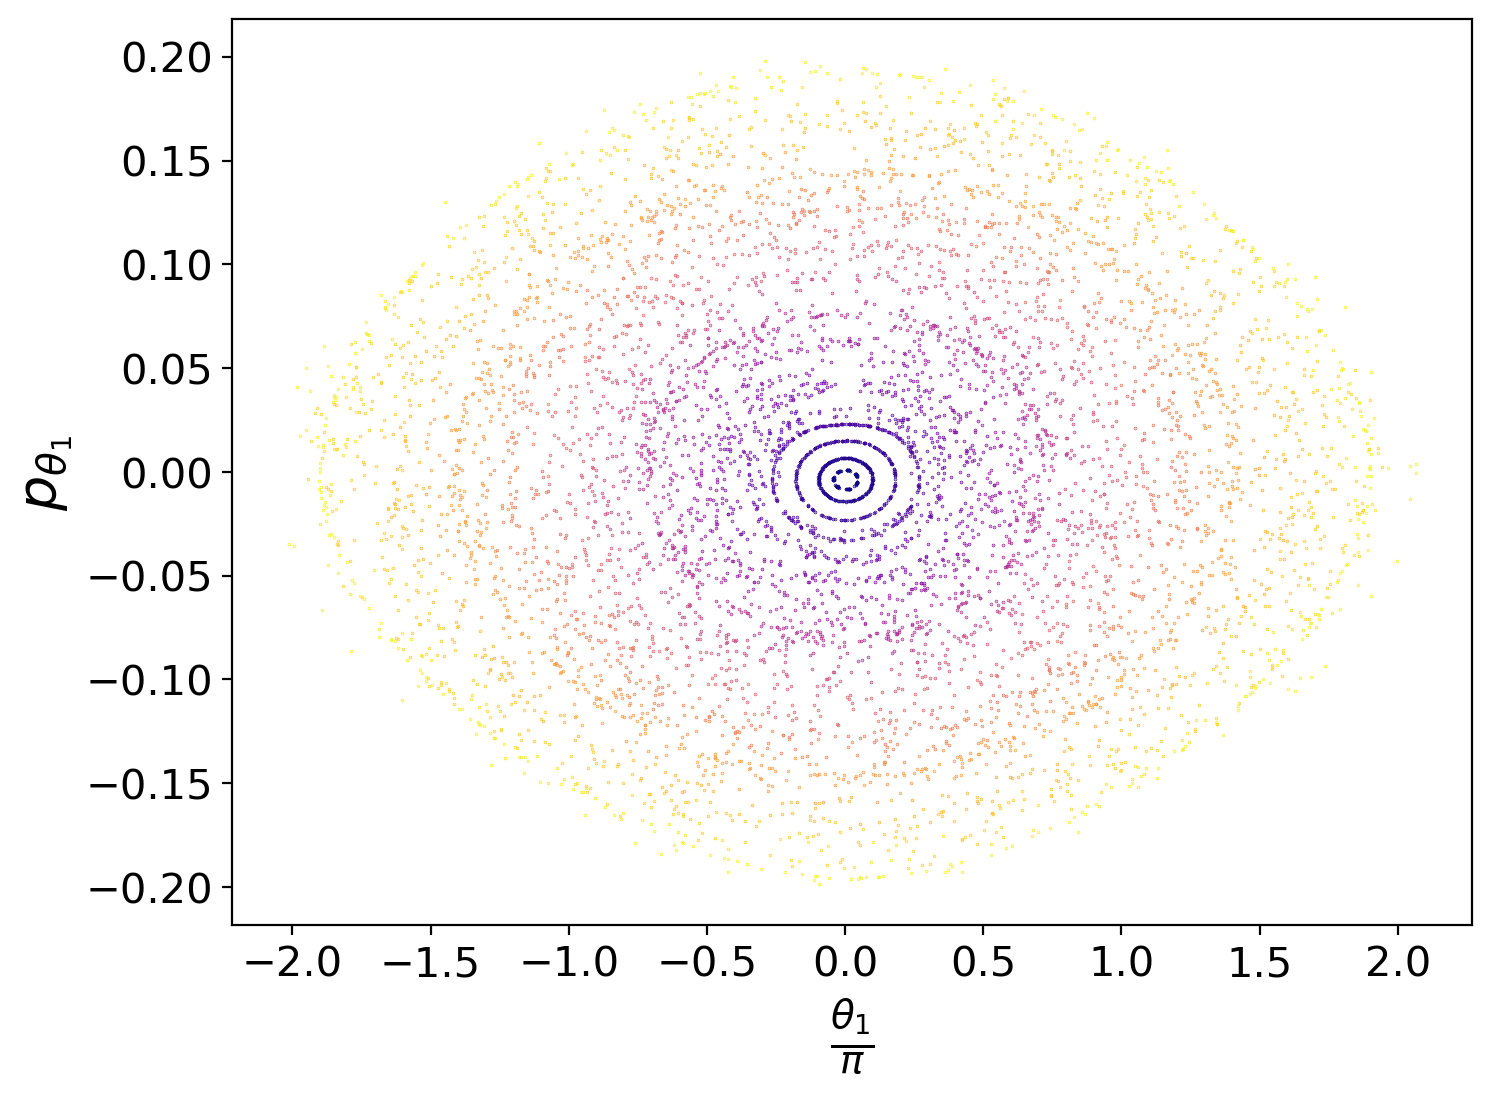

In [242]:
# condições iniciais ( m1 = 0.1, m2=0.005,l1=0.5, l2=0.2 )

p1 = double_pendulum(m1=0.1, m2=0.005, l1=0.5, l2=0.2)

#v10 = np.sqrt((2*p1.m1*p1.l1**2)*(0.1 - p1.m2*10*p1.l2))

# v10 = -0.0872
# p1.system(x10=0, v10=v10, x20=np.pi / 2, v20=0, Tf=5000, dt=0.01, equations="m1>>m2")
# section = p1.poicare_section(phase_space='m1')
# plt.plot(section['theta'], section['ptheta'], '.',color='black', markersize=0.5)

parameter = np.arange(-0.2, 0.2, 0.01)
#section_array = np.full((2, len(parameter), int(5000/0.01)),np.nan)

plt.figure(figsize=(8,6), dpi=200)
for i in range(len(parameter)):
    p1.system(x10=0, v10=parameter[i], x20=np.pi/2, v20=0, Tf=100, dt=0.01, equations="m1=m2")

    section = p1.poicare_section(phase_space='m1')
    #section_array[0, i, :len(section['theta'])] = section['theta']
   # section_array[1, i, :len(section['ptheta'])] = section['ptheta']

    plt.plot(section['theta'], section['ptheta'], '.', markersize=0.5,
             color=plt.cm.plasma(np.max(section['ptheta'])*5))

#plt.title(r'$p_{\theta_{1}}(0) - [0.4,0.4]$')
plt.xlabel(r'$\frac{\theta_1}{\pi}$')
plt.ylabel(r'$p_{\theta_{1}}$')
plt.savefig('poincare_m1_04_001_m1=m2.png')
plt.show()


## Analyzing the time series (solution) for different parameters.

Varying v10 to see if there is a strange behavior

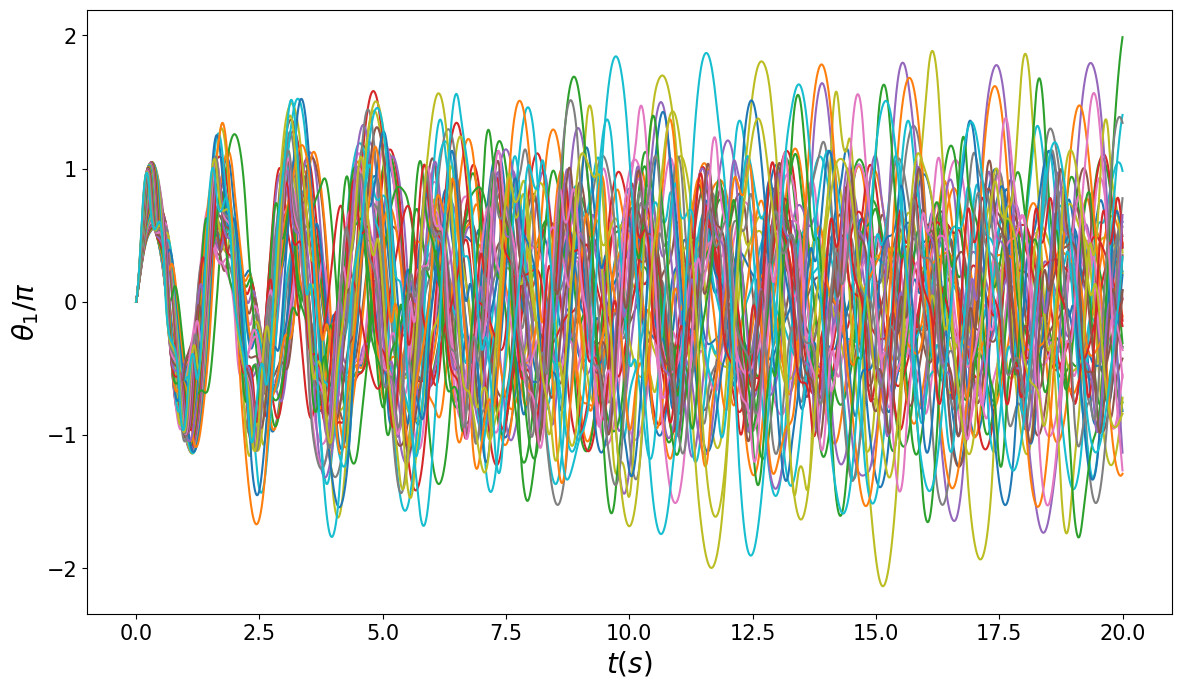

In [236]:
parameter = np.arange(0.040, 0.080,0.001)
data1 = np.zeros((len(parameter), len(np.arange(0,20+0.001, 0.001))))

plt.figure(figsize=(14,8), dpi=100)
for i in range(len(parameter)):
    p1 = double_pendulum(m1=0.1, m2=0.1, l1=0.5, l2=0.2)
    p1.system(x10=0, v10=0.1, x20=np.pi/2, v20=parameter[i], Tf=20, dt=0.001, equations="m1=m2")
    data1[i,:] = p1.data[0]
    plt.plot(np.arange(0,20+0.001, 0.001), p1.data[0])#, color=plt.cm.plasma(parameter[i]*5))
    
#plt.legend()
plt.xlabel(r'$t (s)$')
plt.ylabel(r'$\theta_{1}/\pi$')
plt.savefig("anomaly_1.png")
plt.xlim()
plt.show()

#### Using the Pearson's correlation of each solution

In [112]:
def corr_net(temporal_series):
    
    corr = np.zeros(int(len(temporal_series)*(len(temporal_series) - 1)/2))
    cont = 0
    for i in range(len(data1)):
        for j in range(i+1,len(data1)):
            corr[cont] = np.corrcoef(data1[i,:], data1[j,:])[0,1]
            cont += 1
    
    return corr
          

In [113]:
def correlation_matrix(avg_model, corr):
    size = len(avg_model)
    corr_matrix = np.zeros((size,size))
    cont = 0

    for i in range(size):
        for j in range(i, size):
            if i == j:
                corr_matrix[i,j] = float('nan')


            else:
                corr_matrix[i,j] = corr[cont]
                corr_matrix[j,i] = corr[cont]
                cont += 1 
    return corr_matrix

#### Correlation matrix between the solutions 

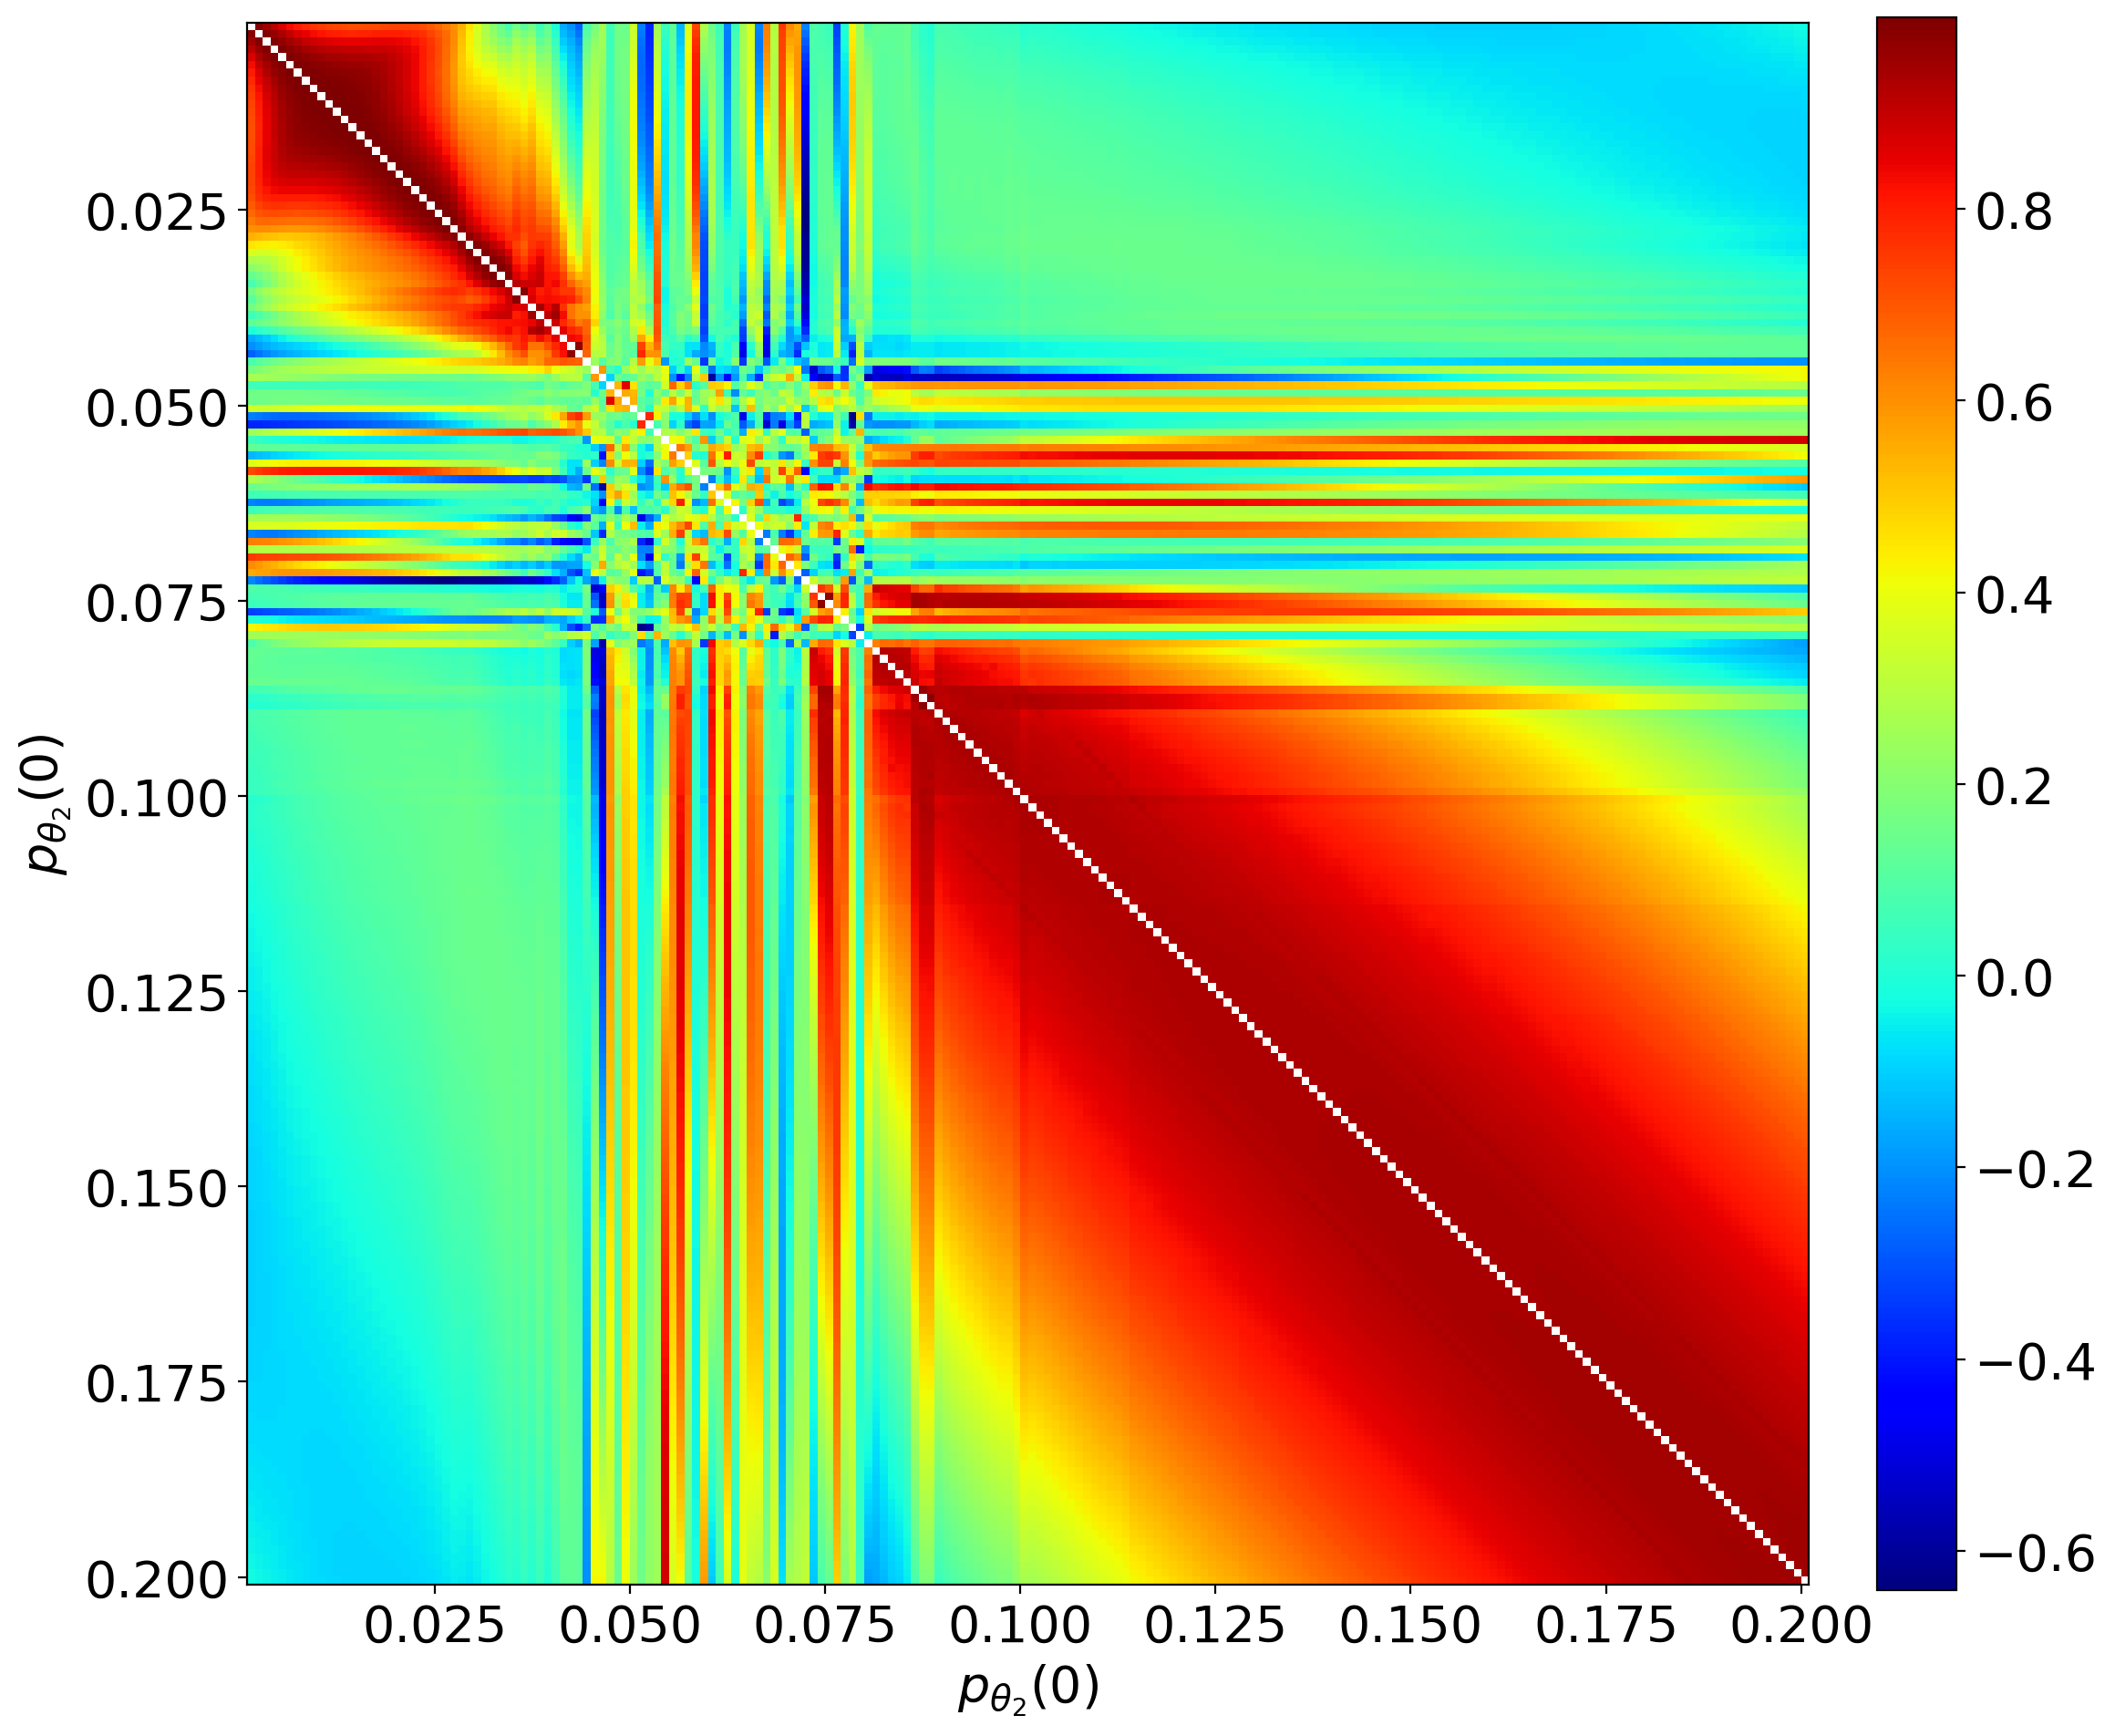

In [142]:
corr = corr_net(data1)

fig, ax = plt.subplots(1,1, figsize=(12,12), dpi=200)
im= plt.imshow(correlation_matrix(data1, corr), 'jet', extent=[0.001,0.201,0.201,0.001])
plt.colorbar(im,fraction=0.046, pad=0.04)

# x_label_list = np.arange(0.11, 0.51, 0.01)
# y_label_list = x_label_list


# ax.set_xticklabels(x_label_list)
# ax.set_yticklabels(y_label_list)
plt.xlabel(r'$p_{\theta_2}(0)$')
plt.ylabel(r'$p_{\theta_2}(0)$')
plt.tight_layout()
plt.savefig("anomali.png")
plt.show()





Anomaly for a set of parameters